In [68]:
import sys
import os
sys.path.append("/Users/mb279434/Documents/stage/repos/argosim/src")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import script
from argosim import antenna_utils, imaging_utils, metrics_utils, plot_utils
from pathlib import Path
from script import run_optimization


In [128]:
import importlib, script
importlib.reload(script)



# Parameters 

n_generations = 50
n_antennas = 30
space_size = 4000
mutation_rate = 1
n_mutations = 80
d_min = 1.0
sigma = 300* d_min   
fov_size = (0.03, 0.03)
im_size = (128, 128)

# Random
init_random = np.array([
    antenna_utils.random_antenna_pos(E_lim=space_size, N_lim=space_size, U_lim=0)
    for _ in range(n_antennas)
])

case_name = "Random"

# Run the 3 cases
res, best_cfg, history = script.run_optimization(
    case_name=case_name,
    init_config=init_random,
    n_generations=n_generations,
    n_mutations=n_mutations,
    mutation_rate=mutation_rate,
    d_min=d_min,
    sigma=sigma,
    w_sll=1.0, w_fwhm=0.1, w_ecc=0.5
)



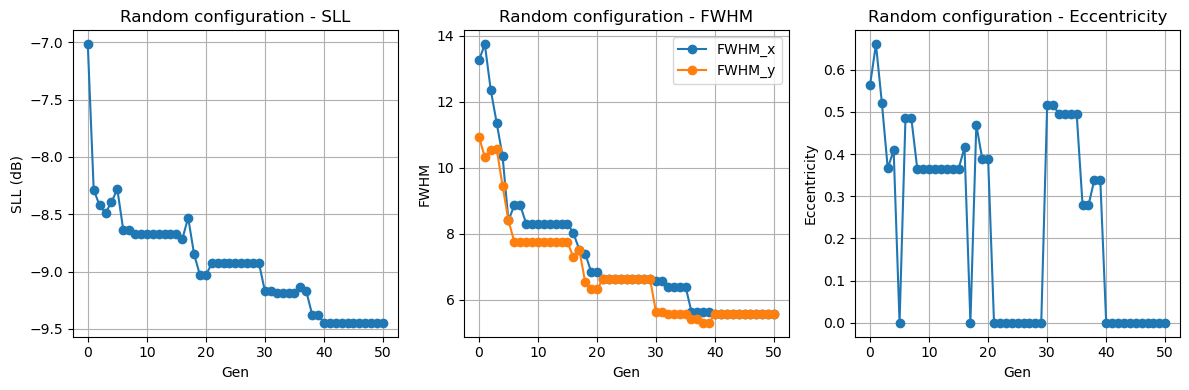

In [129]:
# Plots simples (SLL, FWHM, Eccentricity) 
gens = range(len(history["sll"]))

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(gens, history["sll"], marker='o')
plt.title(f"{case_name} configuration - SLL"); plt.xlabel("Gen"); plt.ylabel("SLL (dB)"); plt.grid(True)

plt.subplot(1,3,2)
plt.plot(gens, history["fwhm_x"], marker='o', label="FWHM_x")
plt.plot(gens, history["fwhm_y"], marker='o', label="FWHM_y")
plt.title(f"{case_name} configuration - FWHM"); plt.xlabel("Gen"); plt.ylabel("FWHM"); plt.legend(); plt.grid(True)

plt.subplot(1,3,3)
plt.plot(gens, history["ecc"], marker='o')
plt.title(f"{case_name} configuration - Eccentricity"); plt.xlabel("Gen"); plt.ylabel("Eccentricity"); plt.grid(True)

plt.tight_layout(); plt.show()


- By increasing the number of iterations and sigma

In [ ]:
import importlib, script
importlib.reload(script)



# Parameters 
n_generations = 150     
n_antennas = 30
space_size = 4000
mutation_rate = 1
n_mutations =80
d_min = 100.0
sigma = 4 * d_min   
fov_size = (0.03, 0.03)
im_size = (128, 128)

# Random
init_random = np.array([
    antenna_utils.random_antenna_pos(E_lim=space_size, N_lim=space_size, U_lim=0)
    for _ in range(n_antennas)
])

case_name = "Random"

# Run the 3 cases
res, best_cfg, history = script.run_optimization(
    case_name=case_name,
    init_config=init_random,
    n_generations=n_generations,
    n_mutations=n_mutations,
    mutation_rate=mutation_rate,
    d_min=d_min,
    sigma=sigma,
    w_sll=1.0, w_fwhm=0.1, w_ecc=0.5
)



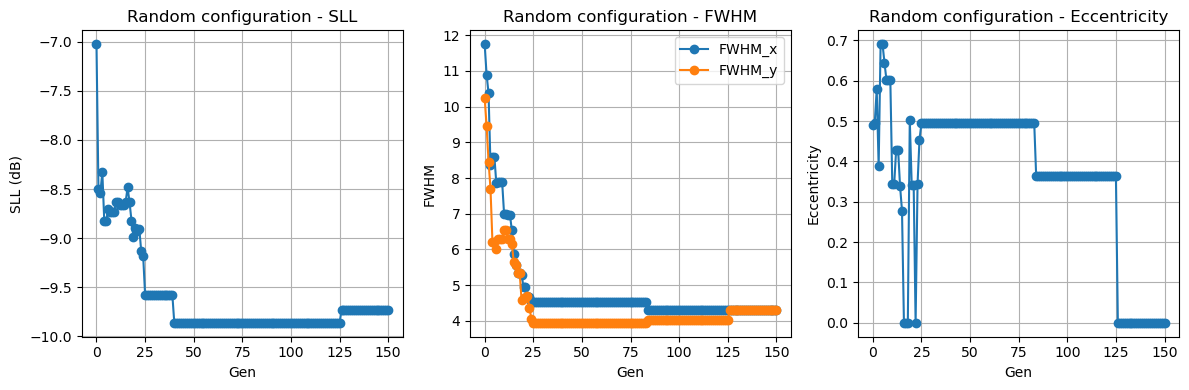

In [ ]:
#  Plots simples (SLL, FWHM, Eccentricity) 
gens = range(len(history["sll"]))

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(gens, history["sll"], marker='o')
plt.title(f"{case_name} configuration - SLL"); plt.xlabel("Gen"); plt.ylabel("SLL (dB)"); plt.grid(True)

plt.subplot(1,3,2)
plt.plot(gens, history["fwhm_x"], marker='o', label="FWHM_x")
plt.plot(gens, history["fwhm_y"], marker='o', label="FWHM_y")
plt.title(f"{case_name} configuration - FWHM"); plt.xlabel("Gen"); plt.ylabel("FWHM"); plt.legend(); plt.grid(True)

plt.subplot(1,3,3)
plt.plot(gens, history["ecc"], marker='o')
plt.title(f"{case_name} configuration - Eccentricity"); plt.xlabel("Gen"); plt.ylabel("Eccentricity"); plt.grid(True)


plt.tight_layout(); plt.show()


- change of mutation rate parameter

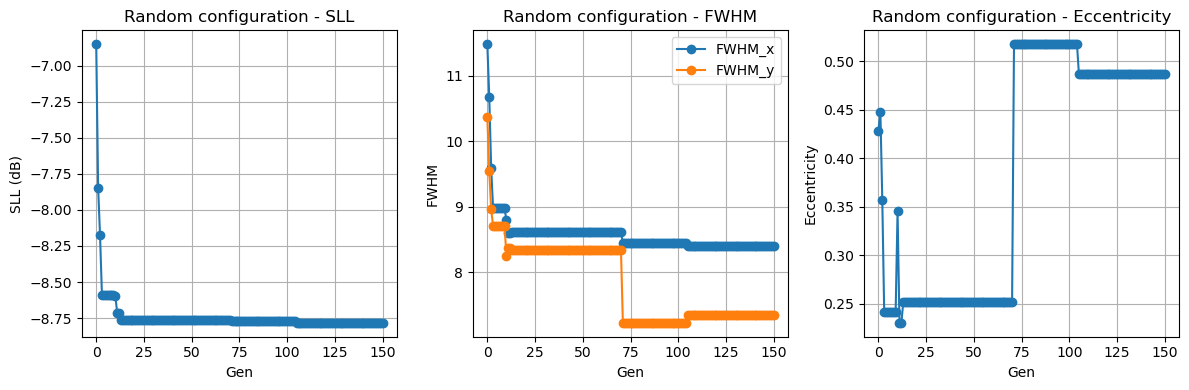

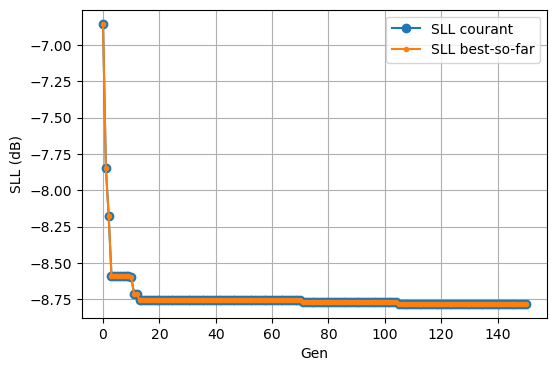

In [ ]:
import importlib, script
importlib.reload(script)



# Parameters 
n_generations = 150
n_antennas = 30
space_size = 4000
mutation_rate = 0.5             #by reducing the mutation rate to 50%
n_mutations =80
d_min = 100.0
sigma = 4 * d_min   
fov_size = (0.03, 0.03)
im_size = (128, 128)

# Random
init_random = np.array([
    antenna_utils.random_antenna_pos(E_lim=space_size, N_lim=space_size, U_lim=0)
    for _ in range(n_antennas)
])

case_name = "Random"

# Run the 3 cases
res, best_cfg, history = script.run_optimization(
    case_name=case_name,
    init_config=init_random,
    n_generations=n_generations,
    n_mutations=n_mutations,
    mutation_rate=mutation_rate,
    d_min=d_min,
    sigma=sigma,
    w_sll=5.0, w_fwhm=0.1, w_ecc=0.5
)

#  Plots simples (SLL, FWHM, Eccentricity) 
gens = range(len(history["sll"]))

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(gens, history["sll"], marker='o')
plt.title(f"{case_name} configuration - SLL"); plt.xlabel("Gen"); plt.ylabel("SLL (dB)"); plt.grid(True)

plt.subplot(1,3,2)
plt.plot(gens, history["fwhm_x"], marker='o', label="FWHM_x")
plt.plot(gens, history["fwhm_y"], marker='o', label="FWHM_y")
plt.title(f"{case_name} configuration - FWHM"); plt.xlabel("Gen"); plt.ylabel("FWHM"); plt.legend(); plt.grid(True)

plt.subplot(1,3,3)
plt.plot(gens, history["ecc"], marker='o')
plt.title(f"{case_name} configuration - Eccentricity"); plt.xlabel("Gen"); plt.ylabel("Eccentricity"); plt.grid(True)


plt.tight_layout(); plt.show()

#best 
gens = range(len(history["sll"]))
best_sll = np.minimum.accumulate(history["sll"])

plt.figure(figsize=(6,4))
plt.plot(gens, history["sll"], marker='o', label="SLL courant")
plt.plot(gens, best_sll, marker='.', label="SLL best-so-far")
plt.xlabel("Gen"); plt.ylabel("SLL (dB)"); plt.grid(True); plt.legend()
plt.show()


- plot: initial configuration vs optimized

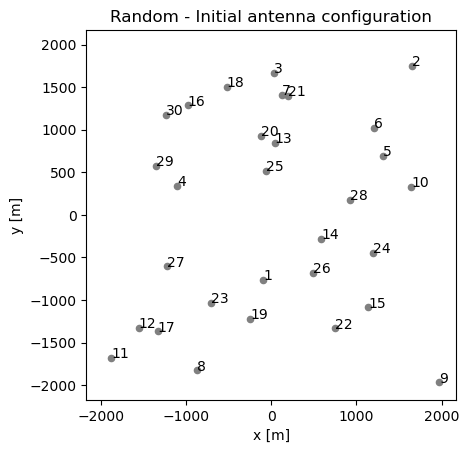

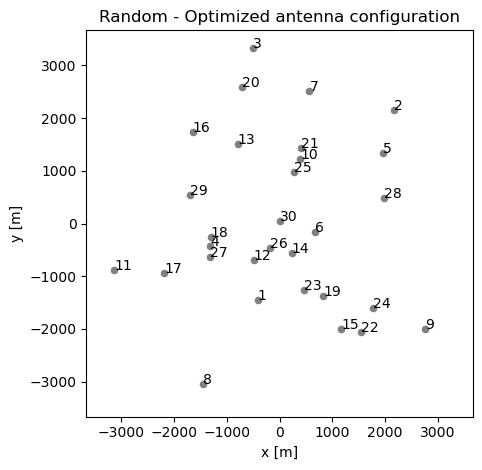

In [178]:
 #fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Initial configuration
plot_utils.plot_antenna_arr(init_random, title=f"{case_name} - Initial antenna configuration", ax=axes[0])

# Optimized configuration
plot_utils.plot_antenna_arr(best_cfg, title=f"{case_name} - Optimized antenna configuration", ax=axes[1])

plt.tight_layout()
plt.show()

# animation

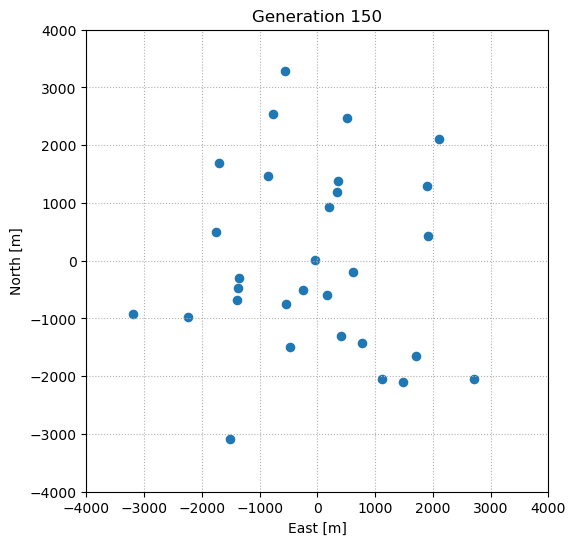

In [179]:
import matplotlib.animation as animation
from IPython.display import HTML

configs = history["configs"]         
N = configs[0].shape[0]

fig, ax = plt.subplots(figsize=(6, 6))
sc = ax.scatter([], [], s=35, c='C0')
ttl = ax.set_title("")

ax.set_xlim(-space_size, space_size)
ax.set_ylim(-space_size, space_size)
ax.set_xlabel("East [m]")
ax.set_ylabel("North [m]")
ax.set_aspect("equal", adjustable="box")
ax.grid(True, ls=":")

def init():
    sc.set_offsets(np.zeros((N, 2)))
    ttl.set_text("Generation 0")
    return sc, ttl

def update(frame):
    cfg = configs[frame]
    sc.set_offsets(cfg[:, :2])        
    ttl.set_text(f"Generation {frame}")
    return sc, ttl

ani = animation.FuncAnimation(
    fig, update,
    frames=len(configs),
    init_func=init,
    interval=200,
    blit=True
)

HTML(ani.to_jshtml())


# Proportion of Antennas Moved After Optimization

Number of antennas moved: 30/30
Percentage moved: 100.0%


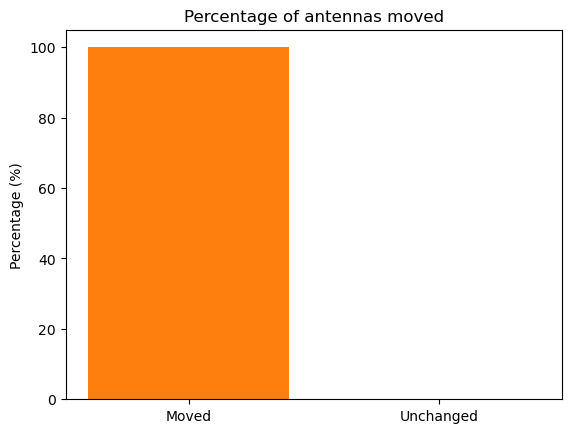

In [184]:

initial_config = init_random
best_cfg       = best_cfg

# Antenna-by-antenna distance 
distances = np.linalg.norm(initial_config - best_cfg, axis=1)

# Threshold to consider an antenna "moved" 
threshold = 1.0  # 1 m
changed = np.sum(distances > threshold)
percent_changed = 100 * changed / len(distances)

print(f"Number of antennas moved: {changed}/{len(distances)}")
print(f"Percentage moved: {percent_changed:.1f}%")


unchanged = len(distances) - changed
labels = ["Moved", "Unchanged"]
sizes = [changed, unchanged]

plt.bar(["Moved", "Unchanged"], [percent_changed, 100 - percent_changed], color=["tab:orange", "tab:blue"])
plt.ylabel("Percentage (%)")
plt.title("Percentage of antennas moved")
plt.show()



# Acceptance Rate of Best-SLL Improvements

Acceptance rate (improvement of best SLL): 5.3%


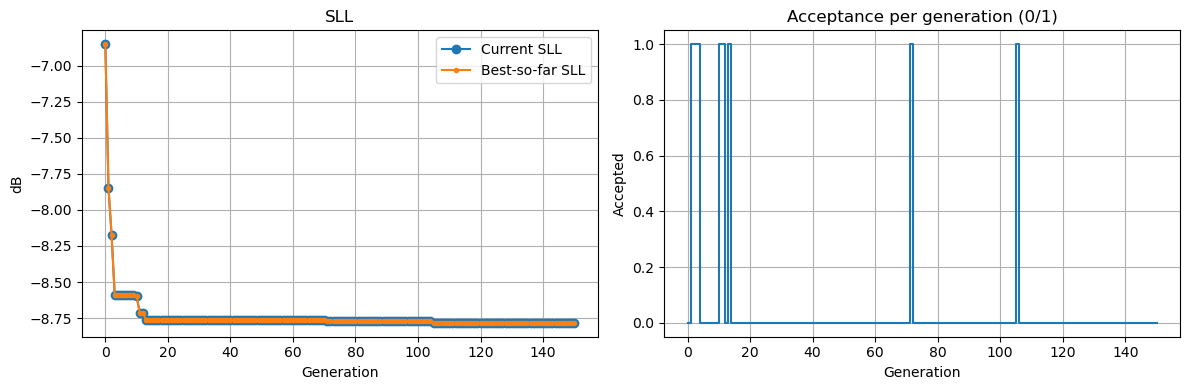

In [ ]:

# "Best-so-far" curve 
sll = np.array(history["sll"])
best_sll = np.minimum.accumulate(sll)

# accepted_flag[t] = 1 if best_sll decreased at iteration t, otherwise 0
accepted_flag = np.zeros_like(best_sll, dtype=int)
accepted_flag[1:] = (best_sll[1:] < best_sll[:-1]).astype(int)

accept_rate = 100 * accepted_flag.mean()

print(f"Acceptance rate (improvement of best SLL): {accept_rate:.1f}%")

# Plot
gens = np.arange(len(best_sll))
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(gens, sll, marker='o', label="Current SLL")
plt.plot(gens, best_sll, marker='.', label="Best-so-far SLL")
plt.title("SLL")
plt.xlabel("Generation")
plt.ylabel("dB")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.step(gens, accepted_flag, where='post')
plt.title("Acceptance per generation (0/1)")
plt.xlabel("Generation")
plt.ylabel("Accepted")
plt.grid(True)

plt.tight_layout()
plt.show()



# Beam

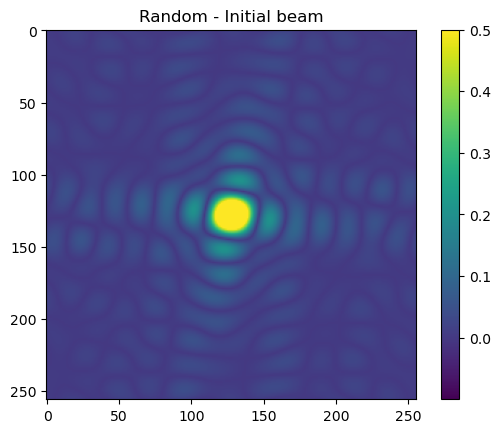

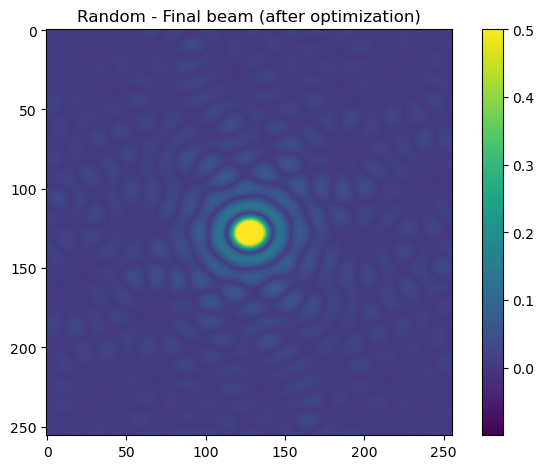

In [181]:
# Beams (initial vs final) 
score_i, beam_initial, _, _ = script.objective(init_random)
score_f, beam_final,   _, _ = script.objective(best_cfg)

beam_initial = np.fft.fftshift(beam_initial)
beam_final   = np.fft.fftshift(beam_final)

plot_utils.plot_beam(beam_initial)
plt.title(f"{case_name} - Initial beam")

plot_utils.plot_beam(beam_final)
plt.title(f"{case_name} - Final beam (after optimization)")

plt.tight_layout()
plt.show()
